<a href="https://colab.research.google.com/github/Bhawesh-Agrawal/Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Amazon Customer Reviews for Household & Personal Care

**Author:** Team Names
**Date:** July 20, 2025

## 1. Introduction

### Business Problem
The goal of this project is to analyze customer reviews for the "Household & Personal Care" category on Amazon. We aim to understand the key drivers of customer satisfaction, identify top products, and explore what makes a review helpful to others.

### Key Questions
* What is the overall distribution of product ratings?
* Is there a relationship between a product's price and its average rating?
* What are the most common topics mentioned in positive vs. negative reviews?

### Data Source
The data used in this analysis is comprised of two datasets sourced from a public repository:
* **Reviews Data:** Contains individual customer reviews, ratings, and helpfulness votes.
* **Metadata:** Contains product information like price, brand, and features.

## Table of Contents
1. [Introduction](#1-introduction)
2. [Setup & Imports](#2-setup--imports)
3. [Data Loading & Inspection](#3-data-loading--inspection)
4. [Data Cleaning](#4-data-cleaning)
5. [Exploratory Data Analysis](#5-exploratory-data-analysis)
6. [Conclusion](#6-conclusion)

## 2. Setup & Imports

In [14]:
# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Settings ---
# Set a consistent style for all plots
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.


## ⚠️ Important: Required Setup

Before you run this notebook, please follow these essential steps to ensure the dataset loads correctly:

1.  **Create a Shortcut to the Dataset**: Go to the dataset at the following link: **https://drive.google.com/drive/folders/1f4r6r0JYd3K8_u0hASJzCVbAUSC67kPz?usp=sharing**.
Right-click on the dataset folder/file and select **"Add shortcut to Drive"**.

2.  **Place Shortcut in "My Drive"**: When prompted for a location, select **"My Drive"**. It's crucial that the shortcut is placed in the main (root) folder of your Google Drive and not inside any other folders.

3.  **Connect Your Drive**: After creating the shortcut, run the first code cell below to connect and mount your Google Drive.

Following these steps will prevent file path errors and ensure the notebook runs smoothly.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Data Loading & Inspection


First, we load the two datasets into pandas DataFrames and then merge them on the `parent_asin` key to create a unified dataset for analysis.

In [16]:
#Health and Personal Care Review Dataset

import json
import pandas as pd

file = "/content/drive/MyDrive/Dataset Segmentation/Health_and_Personal_Care.jsonl"
data = []
# Open and read the JSONL file line by line
with open(file, 'r') as fp:
    for line in fp:
        # Parse each line as a JSON object and append to a list
        data.append(json.loads(line.strip()))

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

In [17]:
# meta data

import json
import pandas as pd
import gzip # Import the gzip library

file = "/content/drive/MyDrive/Dataset Segmentation/meta_Health_and_Personal_Care.jsonl.gz"
data = []
# Use gzip.open to read the compressed .jsonl.gz file
with gzip.open(file, 'r') as fp:
    # Decode each line from bytes to string before loading as JSON
    for line in fp:
        data.append(json.loads(line.strip().decode('utf-8')))

# Convert the list of JSON objects into a pandas DataFrame for metadata
meta_df = pd.DataFrame(data) # Changed df to meta_df

In [18]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1580950175902,3,True
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1604354586880,3,True
2,5.0,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1563966838905,0,True
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,1662258542725,7,True
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,1642722787262,0,True


In [19]:
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Health & Personal Care,Silicone Bath Body Brush Exfoliator Shower Bac...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Rzoeox,[],{'Package Dimensions': '15 x 3.3 x 1.5 inches;...,B07V346GZH,None
1,Health & Personal Care,"iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...",3.8,2,[Tough and Robust: Like all 78X screen protect...,[Features: 2.5D Arc Edge Treatment: The edge i...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],ZHXIN,[],"{'Brand': 'ZHXIN', 'Compatible Devices': 'Cell...",B075W927RH,None
2,Health & Personal Care,Zig Zag Rolling Machine 70mm Size With FREE BO...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],{'Package Dimensions': '4.1 x 1.8 x 0.3 inches...,B01FB26VKY,None
3,Health & Personal Care,Sting-Kill Disposable Wipes 8 Each ( Pack of 5),4.1,6,[],"[effective on stings and bites from bees, wasp...",21.37,[{'thumb': 'https://m.media-amazon.com/images/...,[],Sting-kill,[],"{'Brand': 'Sting-kill', 'Item Form': 'Wipe', '...",B01IAI29RU,None
4,Health & Personal Care,Heated Eyelash Curler Mini Portable Electric E...,3.3,8,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],BiBOSS,[],{'Package Dimensions': '6.1 x 3.1 x 1.9 inches...,B08CMN38RC,None


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             494121 non-null  float64
 1   title              494121 non-null  object 
 2   text               494121 non-null  object 
 3   images             494121 non-null  object 
 4   asin               494121 non-null  object 
 5   parent_asin        494121 non-null  object 
 6   user_id            494121 non-null  object 
 7   timestamp          494121 non-null  int64  
 8   helpful_vote       494121 non-null  int64  
 9   verified_purchase  494121 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 34.4+ MB


This dataset provides a comprehensive collection of **494,121 customer reviews**. Each review is described by 10 distinct attributes, offering deep insights into customer opinions and product details. All columns are fully populated, with no missing values.

***

### Dataset Columns Description

* **`rating`**: A numerical score, stored as a `float`, representing the star rating provided by the customer.
* **`title`**: The summary or title of the review, stored as text (`object`).
* **`text`**: The full, detailed body of the customer's review, also stored as text (`object`).
* **`images`**: Contains information about any images submitted with the review (`object`).
* **`asin`**: The Amazon Standard Identification Number, a unique block of 10 letters and/or numbers that identify items. This is a text-based ID (`object`).
* **`parent_asin`**: The ASIN of the parent product. This is used to group together different variations of a product (e.g., different colors or sizes). It is also a text-based ID (`object`).
* **`user_id`**: A unique identifier for each user who submitted a review (`object`).
* **`timestamp`**: The time the review was submitted, represented as a Unix timestamp (`integer`).
* **`helpful_vote`**: An integer count of how many other users found the review to be helpful.
* **`verified_purchase`**: A boolean value (`True` or `False`) that indicates whether the review comes from a purchase verified by Amazon.

In [21]:
# Display information about the meta_df DataFrame
# This includes the index dtype and columns, non-null values and their counts, and dtypes
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    60293 non-null  object 
 1   title            60293 non-null  object 
 2   average_rating   60293 non-null  float64
 3   rating_number    60293 non-null  int64  
 4   features         60293 non-null  object 
 5   description      60293 non-null  object 
 6   price            10536 non-null  float64
 7   images           60293 non-null  object 
 8   videos           60293 non-null  object 
 9   store            57947 non-null  object 
 10  categories       60293 non-null  object 
 11  details          60293 non-null  object 
 12  parent_asin      60293 non-null  object 
 13  bought_together  0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 6.4+ MB


This dataset contains **60,293 entries**, each representing a unique product. The information for each product is spread across **14 columns**. However, there are significant gaps in the data, particularly in the `price` and `store` columns, and the `bought_together` column is entirely empty.

***

### Column Descriptions

* **`main_category`**: The primary product category (text).
* **`title`**: The title or name of the product (text).
* **`average_rating`**: The average user rating for the product (numeric, `float`).
* **`rating_number`**: The total count of ratings received (numeric, `integer`).
* **`features`**: A list or description of the product's key features (text).
* **`description`**: A detailed text description of the product.
* **`price`**: The price of the product (numeric, `float`). Note that this column has a large number of **missing values** (only 10,536 non-null entries).
* **`images`**: Information related to product images, likely a list of URLs or identifiers (text).
* **`videos`**: Information related to product videos (text).
* **`store`**: The name of the seller or store. This column also has **missing values** (57,947 non-null entries).
* **`categories`**: The full list or path of categories the product belongs to (text).
* **`details`**: A collection of specific product details, often structured as key-value pairs (text).
* **`parent_asin`**: The unique identifier for the parent product, used to group different product variations.
* **`bought_together`**: Intended to list items frequently purchased with the product. This column is **completely empty** (0 non-null entries).

## 4. Data Cleaning

In [22]:
# Merge the two dataframes
reviews_df = pd.DataFrame(df)
merge_df = pd.merge(reviews_df, meta_df, on='parent_asin', how='left')
print("--- Initial Data Overview ---")
print(merge_df.info())

--- Initial Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494121 entries, 0 to 494120
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             494121 non-null  float64
 1   title_x            494121 non-null  object 
 2   text               494121 non-null  object 
 3   images_x           494121 non-null  object 
 4   asin               494121 non-null  object 
 5   parent_asin        494121 non-null  object 
 6   user_id            494121 non-null  object 
 7   timestamp          494121 non-null  int64  
 8   helpful_vote       494121 non-null  int64  
 9   verified_purchase  494121 non-null  bool   
 10  main_category      494121 non-null  object 
 11  title_y            494121 non-null  object 
 12  average_rating     494121 non-null  float64
 13  rating_number      494121 non-null  int64  
 14  features           494121 non-null  object 
 15  description        49

## 5. Exploratory Data Analysis

### Analyzing Overall Customer Sentiment

This chart provides a high-level summary of customer sentiment by visualizing the frequency of each star rating. It allows for a quick assessment of whether products are generally well-received (a majority of 4 and 5-star reviews) or are facing issues (a notable number of 1 and 2-star reviews). This is crucial for gauging overall satisfaction and spotting potential red flags in the dataset at a glance.

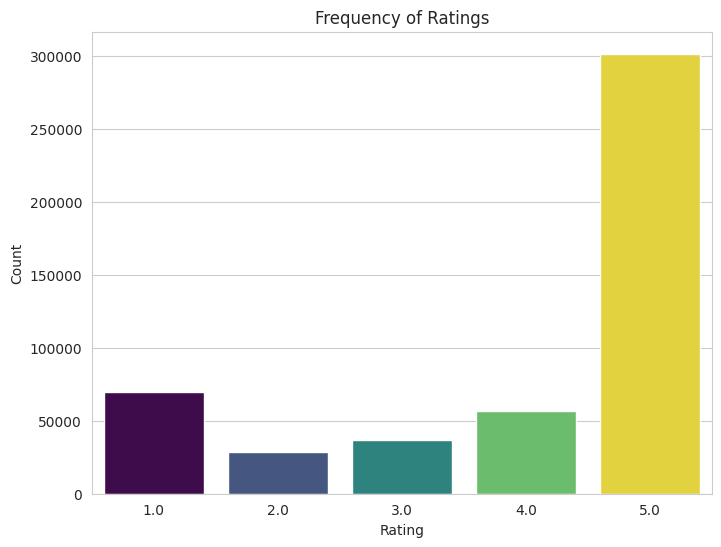

In [23]:
# freq of ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))
# Generate a countplot to show the frequency of each rating value
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
# Set the title of the plot
plt.title('Frequency of Ratings')
# Set the label for the x-axis
plt.xlabel('Rating')
# Set the label for the y-axis
plt.ylabel('Count')
# Display the plot
plt.show()

### Product Quality Distribution

This histogram shows the distribution of **average ratings** across all products in the catalog. It helps understand the overall quality of the inventory by revealing how many products fall into different rating brackets (e.g., high, medium, or low-rated). This is useful for gauging the general market perception and identifying if the catalog is skewed towards high-quality or poorly-performing items.

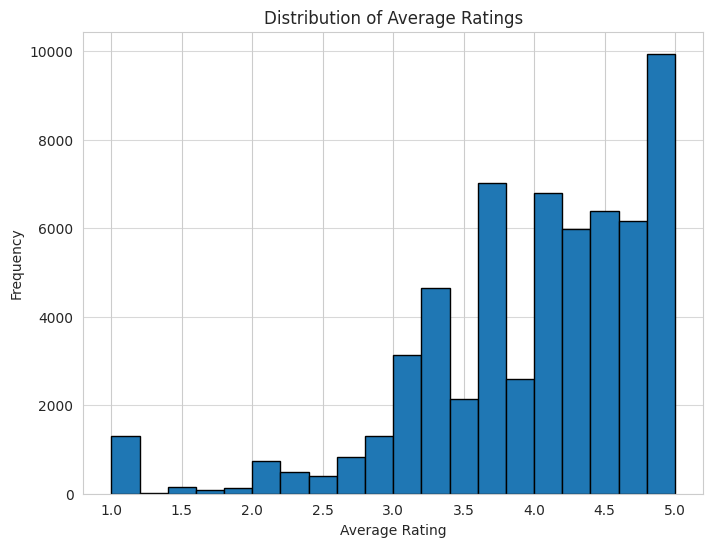

In [24]:
#distribution of avg ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(meta_df['average_rating'], bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Analyzing Product Price Points

This histogram illustrates the **distribution of product prices**, helping to identify the most common price brackets across the catalog. This is key to understanding the market positioning of the inventory, revealing whether it leans towards budget-friendly, mid-range, or luxury goods. The plot provides a clear view of the overall pricing strategy and helps to easily spot outliers.

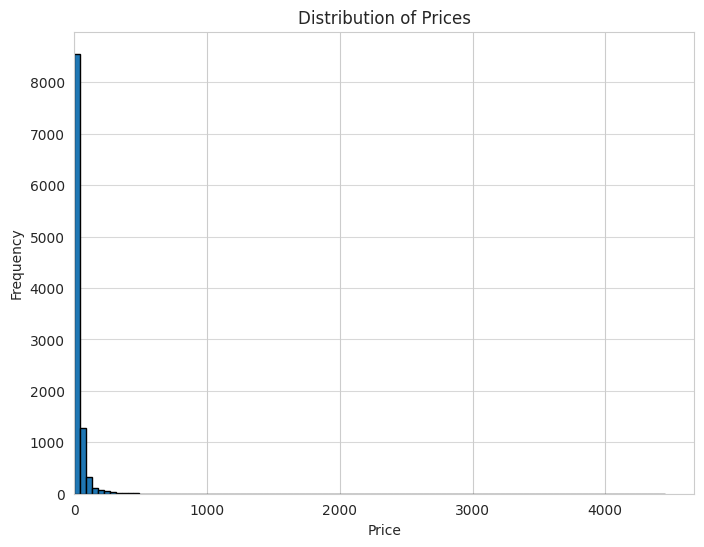

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(meta_df['price'].dropna(), bins=100, edgecolor='black') # Increased bins for more detail
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0,) # Set x-axis limit to start from 0
plt.show()

### Gauging Review Helpfulness

This histogram shows the distribution of "helpful votes" across all reviews, revealing how review utility is spread. It's common for most reviews to have zero or very few helpful votes, so this chart quickly confirms that pattern and highlights the small number of highly influential reviews. Analyzing this distribution is the first step toward understanding what makes a review truly valuable to other customers.

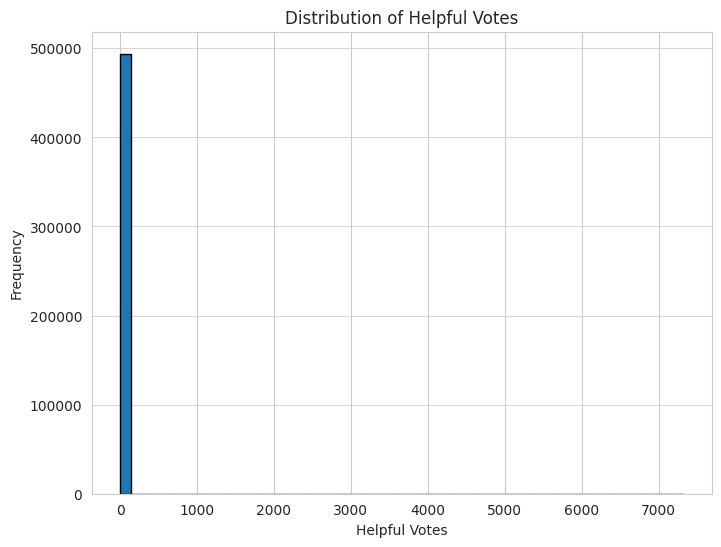

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['helpful_vote'], bins=50, edgecolor='black') # Using a reasonable number of bins
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Exploring the Price vs. Quality Relationship

This scatter plot is designed to investigate the relationship between a product's price and its perceived quality (the average rating). Each point on the plot represents a single product, positioned according to its price and rating. This visualization helps to answer key business questions, such as "Do more expensive products get better ratings?" and allows for the easy identification of market segments, like high-quality budget items or potentially overpriced luxury goods.

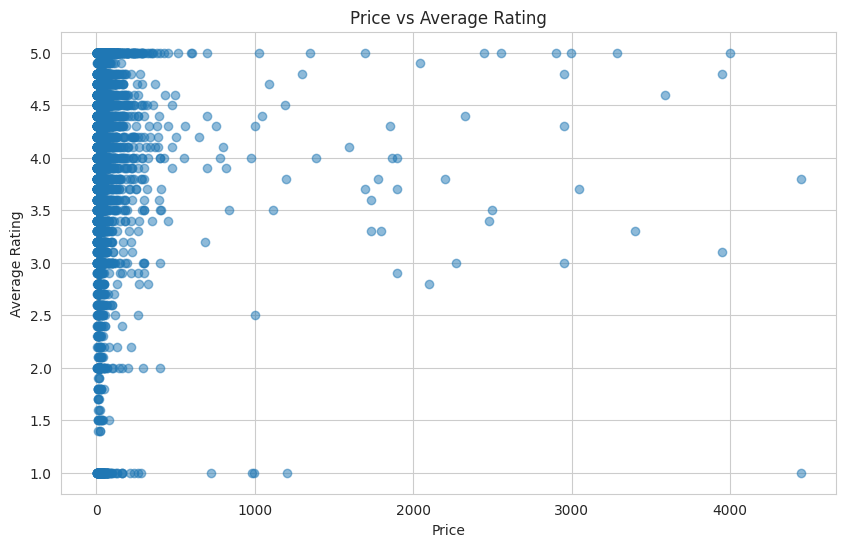

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(meta_df['price'], meta_df['average_rating'], alpha=0.5)
plt.title('Price vs Average Rating')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


### Identifying Most Popular Products

This horizontal bar chart identifies the **most frequently reviewed products** in the dataset, which serves as a strong indicator of their popularity or high sales volume. The review counts are displayed on a **scaled (logarithmic) axis** to ensure that even products with vast differences in review numbers can be compared effectively. This visualization is crucial for pinpointing the most significant products that drive the most customer interaction and have the largest footprint in the catalog.

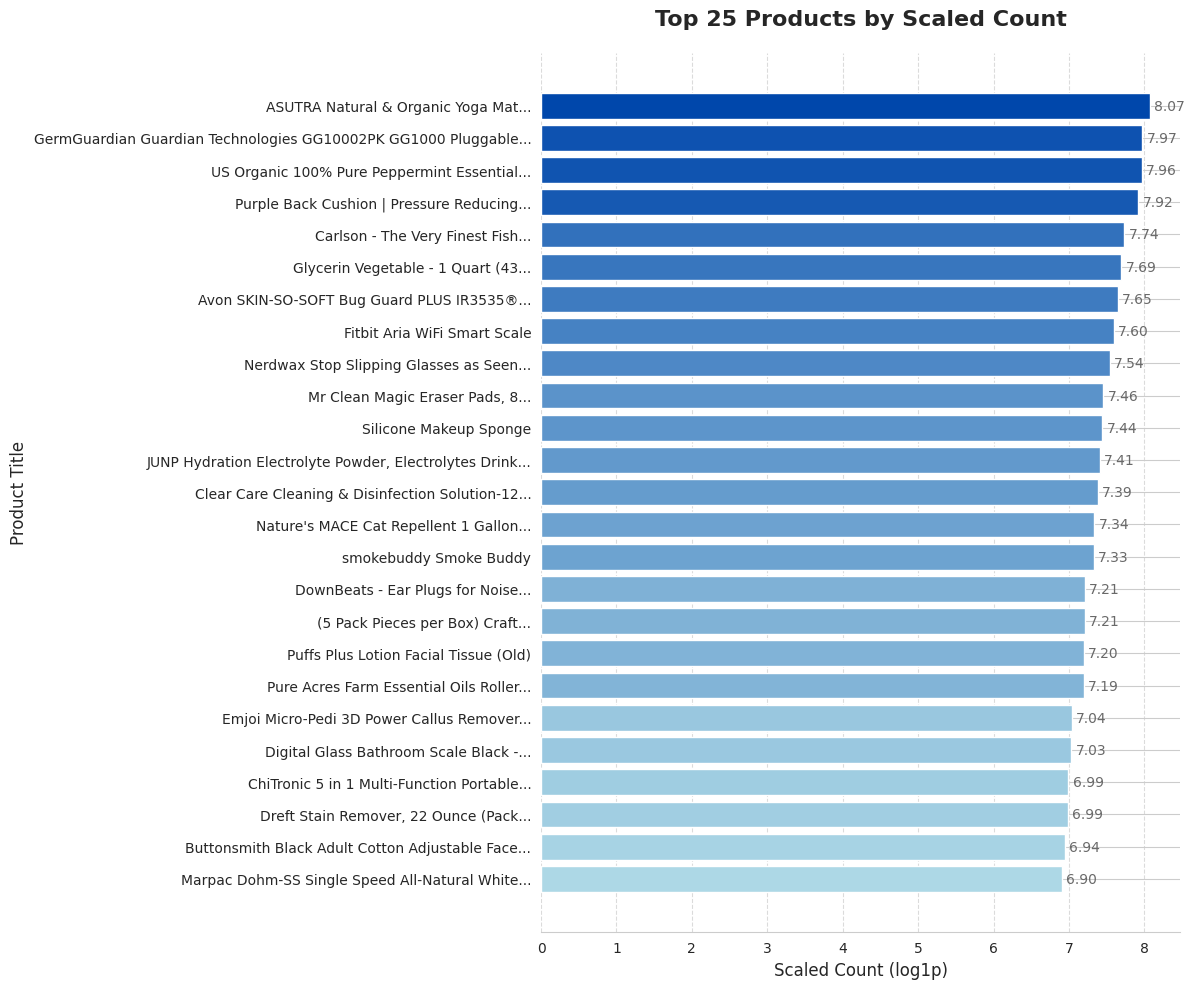

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

asin_counts = df['parent_asin'].value_counts()
scaled_asin_counts = np.log1p(asin_counts)
asin_to_title_map = meta_df[meta_df['parent_asin'].isin(asin_counts.index)].set_index('parent_asin')['title'].to_dict()

N = 25
top_n_counts = scaled_asin_counts.nlargest(N)

def shorten_title(title, num_words=6):
    """Shortens a string to a specified number of words."""
    words = str(title).split()
    if len(words) > num_words:
        return ' '.join(words[:num_words]) + '...'
    return ' '.join(words)

top_n_titles = [shorten_title(asin_to_title_map.get(asin, str(asin))) for asin in top_n_counts.index]

fig, ax = plt.subplots(figsize=(12, 10))

cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ["#ADD8E6", "#0047AB"])
norm = mcolors.Normalize(vmin=top_n_counts.min(), vmax=top_n_counts.max())
colors = cmap(norm(top_n_counts.values))

# Use a horizontal bar chart (barh)
bars = ax.barh(
    range(N),
    top_n_counts.values[::-1],
    color=colors[::-1]
)

ax.set_yticks(range(N))
ax.set_yticklabels(top_n_titles[::-1])

ax.bar_label(bars, fmt='%.2f', padding=3, color='dimgray', fontsize=10)
ax.set_title(f'Top {N} Products by Scaled Count', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Scaled Count (log1p)', fontsize=12)
ax.set_ylabel('Product Title', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Analyzing the Impact of Images on Ratings

This count plot compares the distribution of ratings for two distinct groups: reviews that contain images and reviews that do not. The purpose is to investigate whether the presence of visual evidence correlates with the review's sentiment. This analysis can reveal if customers are more likely to upload images when they are highly satisfied or, conversely, when they are lodging a complaint about a faulty product.

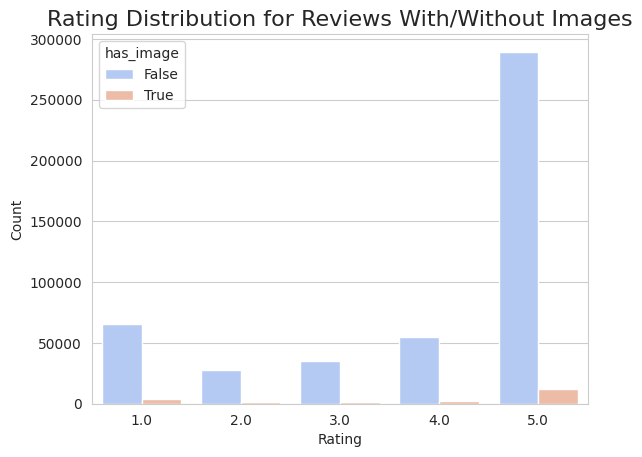

In [29]:
df['has_image'] = df['images'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)
sns.countplot(data=df, x='rating', hue='has_image', palette='coolwarm')
plt.title('Rating Distribution for Reviews With/Without Images', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Uncovering Relationships Between Numerical Features

This **correlation heatmap** provides a concise visual summary of the linear relationships between key numerical variables like price, ratings, and helpful votes. Each cell shows the correlation coefficient between two features, with warm colors indicating a positive relationship (as one variable increases, the other tends to increase) and cool colors indicating a negative one. This allows for a quick scan to identify significant associations, such as whether higher prices are linked to higher ratings, which can guide further, more detailed analysis.

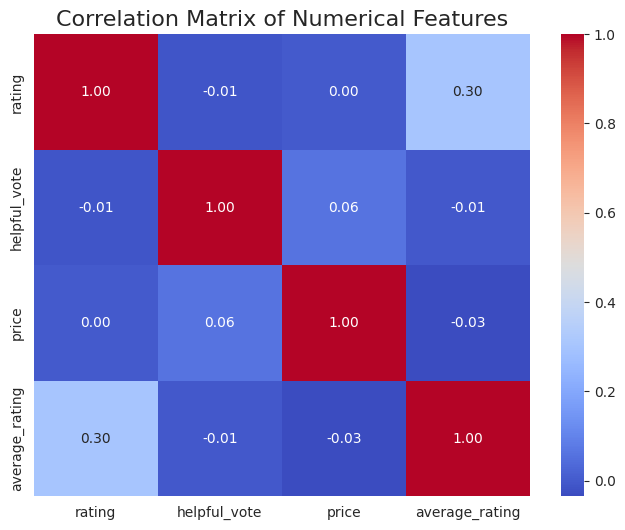

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

numerical_cols = ['rating', 'helpful_vote', 'price', 'average_rating']

heatmap_df = merge_df[numerical_cols].dropna()

correlation_matrix = heatmap_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Identifying Key Themes in Customer Feedback

This word cloud visually summarizes the most frequent terms found within customer reviews, with the size of each word corresponding to its frequency. By creating separate clouds for positive (5-star) and negative (1-star) reviews, we can instantly identify the key themes driving customer sentiment. This helps to quickly grasp what customers love most about a product or, conversely, what the most common complaints and issues are.

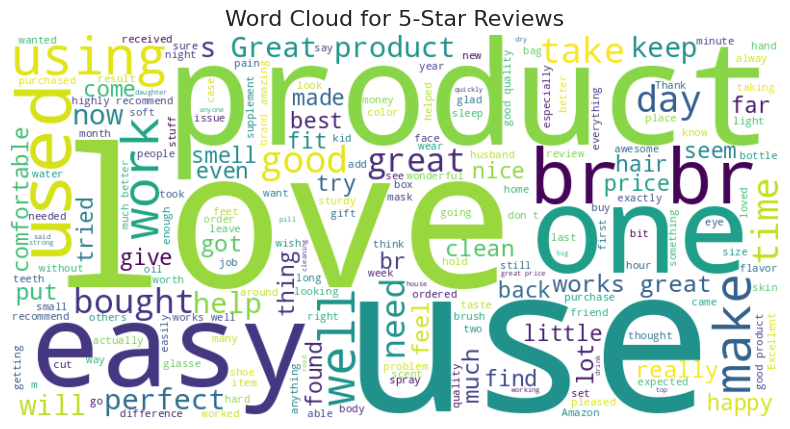

In [31]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['rating'] == 5]['text'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews', fontsize=16)
plt.show()

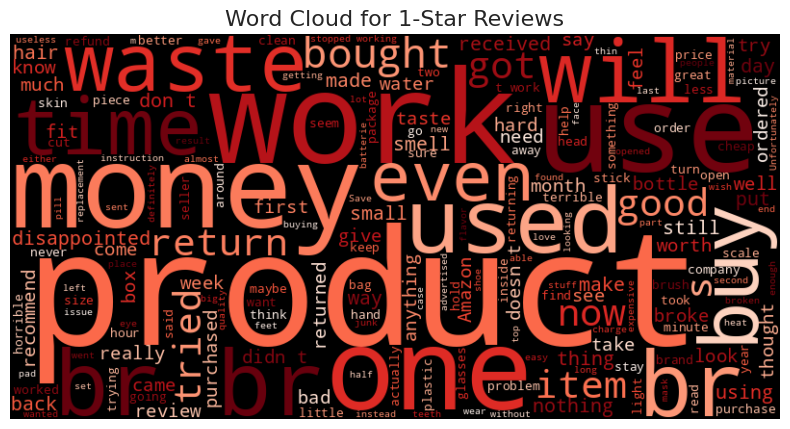

In [32]:
# Word Cloud for Negative (1-star) Reviews
negative_text = ' '.join(df[df['rating'] == 1]['text'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 1-Star Reviews', fontsize=16)
plt.show()

### Tracking Customer Sentiment Over Time

This line plot shows the trend of average customer ratings on a month-by-month basis. Its purpose is to visualize whether overall customer satisfaction is improving, declining, or staying consistent over time. This analysis is crucial for understanding the long-term perception of a product and for evaluating the impact of changes like feature updates or marketing campaigns.

Generating plot with the following data:
    year_month    rating
0      2001-02  3.000000
1      2001-03  1.000000
2      2001-05  5.000000
3      2001-07  4.000000
4      2001-08  5.000000
..         ...       ...
252    2023-05  3.732867
253    2023-06  3.806569
254    2023-07  3.928205
255    2023-08  3.973333
256    2023-09  3.550000

[257 rows x 2 columns]


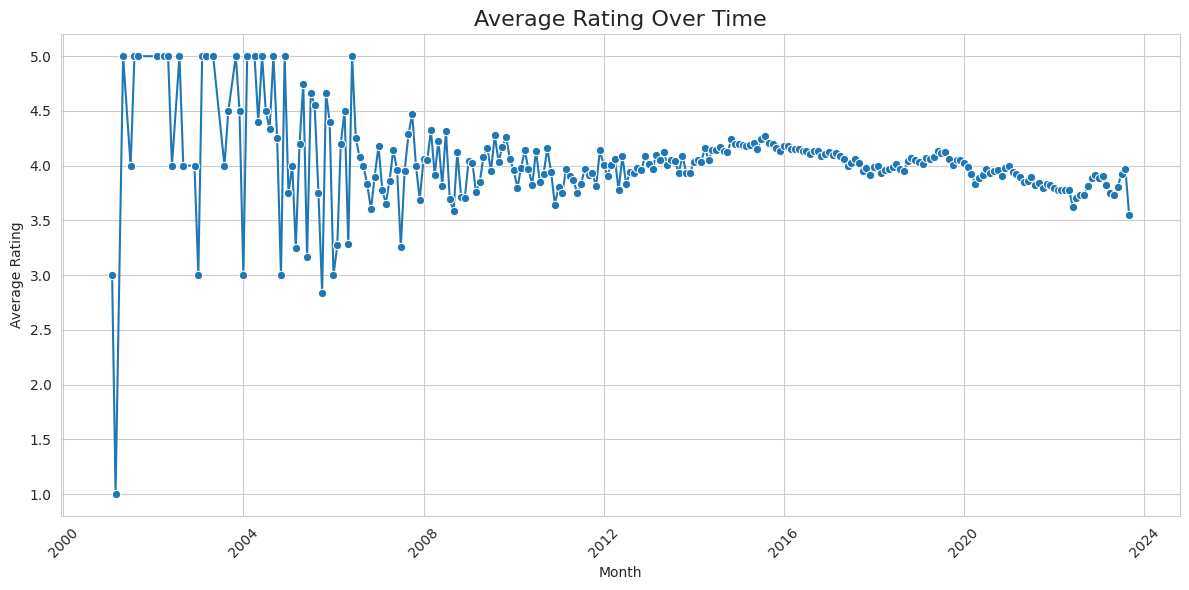

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['year_month'] = df['timestamp'].dt.to_period('M')
monthly_avg_rating = df.groupby('year_month')['rating'].mean().reset_index()

if len(monthly_avg_rating) > 1:
    print("Generating plot with the following data:")
    print(monthly_avg_rating)

    plt.figure(figsize=(12, 6))
    # Convert period back to timestamp for plotting
    monthly_avg_rating['year_month'] = monthly_avg_rating['year_month'].dt.to_timestamp()

    sns.lineplot(data=monthly_avg_rating, x='year_month', y='rating', marker='o')

    plt.title('Average Rating Over Time', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Plot not generated. Not enough data (fewer than 2 months) to show a trend.")
    print("\nData after grouping:")
    print(monthly_avg_rating)